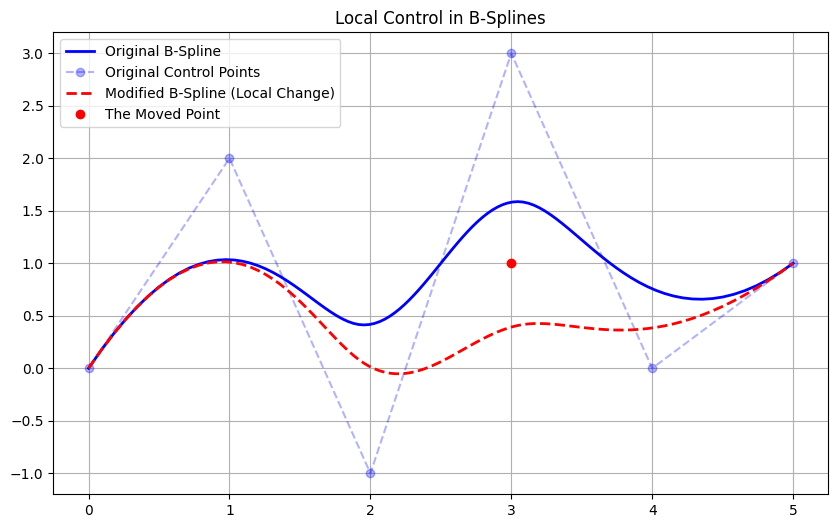

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# 1. Define Control Points (The "Handles" of the curve)
# We will create two sets: one original, and one with a single point moved.
ctrl_pts_1 = np.array([[0, 0], [1, 2], [2, -1], [3, 3], [4, 0], [5, 1]])
ctrl_pts_2 = ctrl_pts_1.copy()
ctrl_pts_2[3] = [3, 1] # We only move the 4th point (index 3) downwards

# 2. Define Knots (Required for B-splines)
# For a degree k spline, we need n + k + 1 knots
k = 3 # Degree (3 = Cubic)
n = len(ctrl_pts_1)
knots = np.concatenate(([0]*k, np.arange(n-k+1), [n-k]*k))

# 3. Create the B-spline objects
spline1 = BSpline(knots, ctrl_pts_1, k)
spline2 = BSpline(knots, ctrl_pts_2, k)

# 4. Generate points along the curve for plotting
t = np.linspace(0, n-k, 100)
curve1 = spline1(t)
curve2 = spline2(t)

# 5. Plotting
plt.figure(figsize=(10, 6))

# Plot Original Curve
plt.plot(curve1[:, 0], curve1[:, 1], 'b-', label='Original B-Spline', linewidth=2)
plt.plot(ctrl_pts_1[:, 0], ctrl_pts_1[:, 1], 'bo--', alpha=0.3, label='Original Control Points')

# Plot Modified Curve
plt.plot(curve2[:, 0], curve2[:, 1], 'r--', label='Modified B-Spline (Local Change)', linewidth=2)
plt.plot(ctrl_pts_2[3, 0], ctrl_pts_2[3, 1], 'ro', label='The Moved Point')

plt.title("Local Control in B-Splines")
plt.description = "Notice how the red dashed line only deviates from the blue line near the moved point."
plt.legend()
plt.grid(True)
plt.show()